***Exploratory Data Analysis of Data Extratcted from Consumer Forum website --*** https://consumercomplaints.in

**Categorty of data extracted - Banks**

**Tools used for data extraction - webscraper.io**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### ***Required Installation and Imports***

In [ ]:
%%capture
!pip install dataprep
!pip install --upgrade plotly

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#import modules and read the dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr #for correlation when relationship is linear
from scipy.stats import spearmanr #for correlation when relationship is non-linear
from dataprep.eda import plot, plot_correlation, plot_missing
from dataprep.eda import create_report
%matplotlib inline

NumExpr defaulting to 2 threads.


In [ ]:
#import modules for interactive plotting
import plotly.graph_objs as go
import plotly.express as px

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### ***Load and read data***

In [ ]:
df = pd.read_csv('drive/MyDrive/clean_merged_v4.csv')

In [ ]:
df.head()

Unnamed: 0 web-scraper-order  ... complaint_date_changed Update_date_changed
0           0   1624943926-6488  ...                    NaN          14-08-2020
1           1   1624945217-6764  ...                    NaN          02-10-2016
2           2   1624943954-6500  ...             23-01-2019          14-08-2020
3           3   1624945602-6877  ...             17-10-2018          18-11-2016
4           4   1624944090-6543  ...                    NaN          21-03-2019

[5 rows x 22 columns]

***Number of rows and columns in the dataframe***

In [ ]:
df.shape

(68891, 22)

***Additional information about columns in dataframe -- non-null count and data types***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68891 entries, 0 to 68890
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              68891 non-null  int64 
 1   web-scraper-order       68891 non-null  object
 2   web-scraper-start-url   68891 non-null  object
 3   comments                53914 non-null  object
 4   title                   68891 non-null  object
 5   title-href              22000 non-null  object
 6   username                68891 non-null  object
 7   date                    32661 non-null  object
 8   complaint-des           68891 non-null  object
 9   complaint-status        49850 non-null  object
 10  complaint-status-date   62488 non-null  object
 11  response                22000 non-null  object
 12  resolved-status         68891 non-null  object
 13  location                53583 non-null  object
 14  City                    53583 non-null  object
 15  St

# ***Missing Value Analysis***

***Number of missing values in each column***

In [ ]:
print(print("\033[1m" + "  Number of nulls in each column" + "\033[0m" + "\n"))
df.isna().sum()

  Number of nulls in each column

None


Unnamed: 0                    0
web-scraper-order             0
web-scraper-start-url         0
comments                  14977
title                         0
title-href                46891
username                      0
date                      36230
complaint-des                 0
complaint-status          19041
complaint-status-date      6403
response                  46891
resolved-status               0
location                  15308
City                      15308
State                     15308
Comp Name                     0
Title                         0
Company Name                  0
new_complaint_body            0
complaint_date_changed    36230
Update_date_changed        6403
dtype: int64

***Visual Representation of the missing values in each column***

Text(0.5, 1.0, 'MISSING VALUE ANALYSIS')

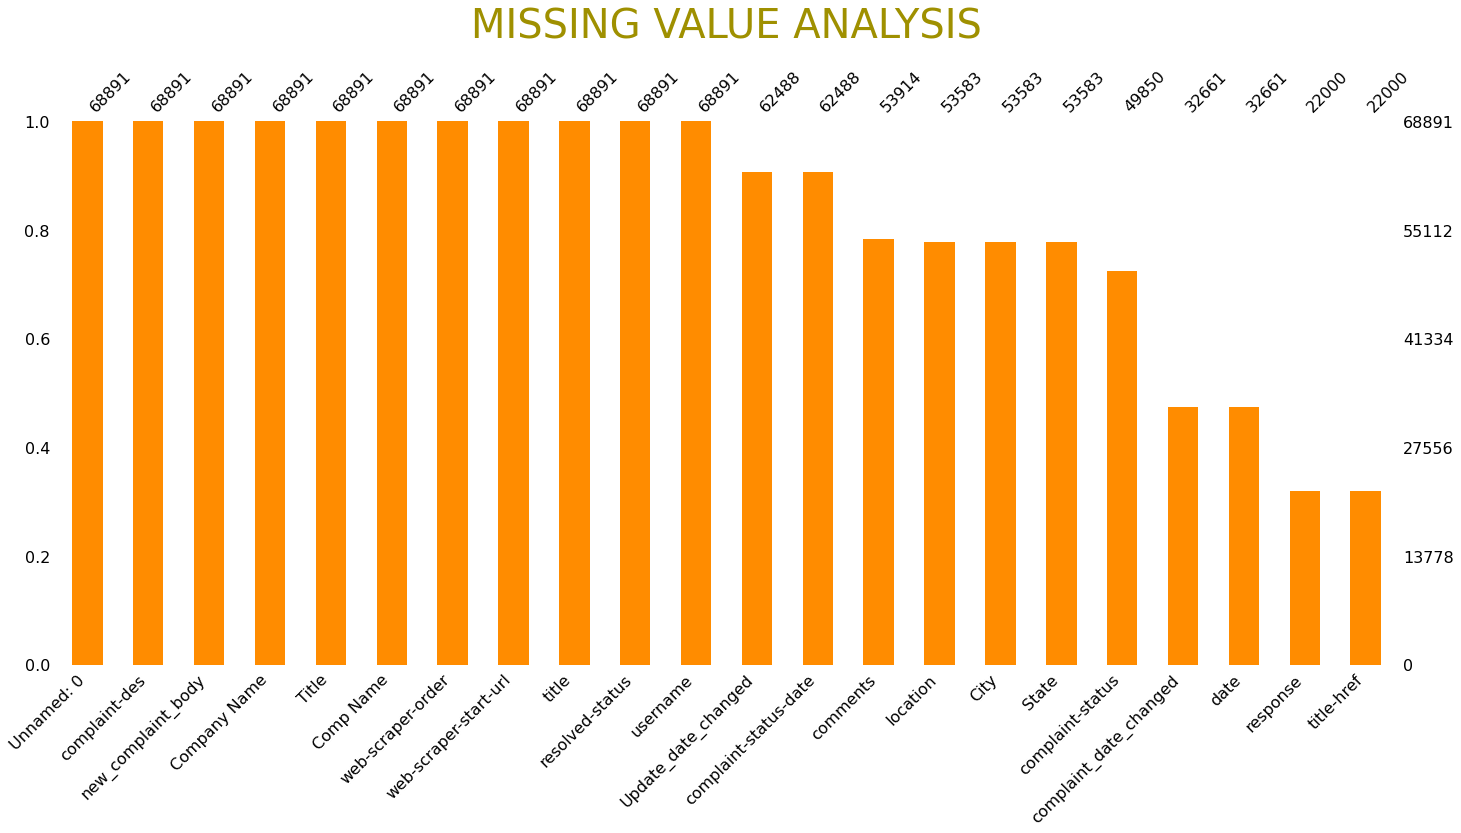

In [ ]:
import missingno as msno
miss = msno.bar(df,n=16, p=0.9, sort='descending', color='darkorange')
miss.set_title("MISSING VALUE ANALYSIS", fontsize=40, pad=30, color='#9f9000')
miss

#### ***Unique Value Analysis***

***Number of unique values in each column***

In [ ]:
df_unique = df.nunique()
df_unique = df_unique.to_frame()
df_unique.columns=['Unique Count']
print("\033[1m" + "    Unique value count for each column" + "\033[0m" + "\n")
df_unique.head(48)

    Unique value count for each column



Unique Count
Unnamed: 0                     68891
web-scraper-order              68891
web-scraper-start-url           4148
comments                       24189
title                          65738
title-href                     21858
username                       64496
date                            3424
complaint-des                  68644
complaint-status                1839
complaint-status-date           3093
response                       10469
resolved-status                    2
location                        1692
City                            1661
State                             42
Comp Name                       3084
Title                          62886
Company Name                    3084
new_complaint_body             68644
complaint_date_changed          3424
Update_date_changed             2607

# **Complaints resolved vs unresolved across entire dataset**

<Figure size 720x720 with 0 Axes>

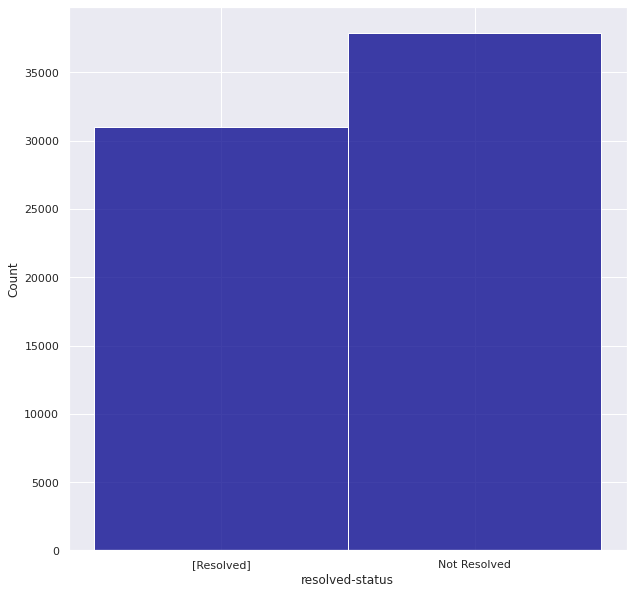

In [ ]:
resolved_status = df.groupby('resolved-status').count()
plt.figure(figsize=(10,10)) 

sns.set_theme(color_codes=True)
sns.histplot(x="resolved-status",data=df, color='darkblue')

***From the above visual of the distribution of resolved and unresolved complaints across the dataframe, the number of not resolved complaints is higher than the number of resolved complaints.***

# ***Distribution of Complaints across each state***

In [ ]:
df_state = df[['web-scraper-order', 'State']]
i = df_state.groupby('State', as_index=False).count()
i.dtypes
i.rename(columns={'web-scraper-order':'total count'}, inplace=True)
i

State                object
web-scraper-order     int64
dtype: object

State  total count
0    Andaman and Nicobar Islands           35
1                 Andhra Pradesh         1199
2              Arunachal Pradesh           20
3                          Assam          489
4               Balasore, Odisha            1
5                          Bihar          515
6          Chakrata, Uttarakhand            1
7                     Chandigarh          359
8                   Chhattisgarh          316
9         Dadra and Nagar Haveli           22
10                 Daman and Diu           15
11                         Delhi         6435
12                           Goa          172
13                       Gujarat         2054
14                       Haryana         2381
15              Himachal Pradesh          189
16             Jammu and Kashmir          339
17                     Jharkhand          276
18                     Karnataka         5191
19        Karnataka98, Karnataka            1
20                        Kerala         1164
21                   Lakshadweep            2
22                Madhya Pradesh         1101
23                   Maharashtra        14500
24                       Manipur           73
25                     Meghalaya           33
26                       Mizoram           68
27                      Nagaland            4
28          Noida, Uttar Pradesh            1
29                        Odisha          520
30                    Puducherry           49
31                        Punjab         1211
32                     Rajasthan         1128
33                        Sikkim            8
34                    Tamil Nadu         4193
35       Tamil nadu , Tamil Nadu            1
36                     Telangana         2886
37                       Tripura           27
38                 Uttar Pradesh         3943
39                   Uttarakhand          384
40                   West Bengal         2276
41         KARAJAGI, Maharashtra            1

In [ ]:
i['State'].unique()

array([' Andaman and Nicobar Islands', ' Andhra Pradesh',
       ' Arunachal Pradesh', ' Assam', ' Balasore, Odisha', ' Bihar',
       ' Chakrata, Uttarakhand', ' Chandigarh', ' Chhattisgarh',
       ' Dadra and Nagar Haveli', ' Daman and Diu', ' Delhi', ' Goa',
       ' Gujarat', ' Haryana', ' Himachal Pradesh', ' Jammu and Kashmir',
       ' Jharkhand', ' Karnataka', ' Karnataka98, Karnataka', ' Kerala',
       ' Lakshadweep', ' Madhya Pradesh', ' Maharashtra', ' Manipur',
       ' Meghalaya', ' Mizoram', ' Nagaland', ' Noida, Uttar Pradesh',
       ' Odisha', ' Puducherry', ' Punjab', ' Rajasthan', ' Sikkim',
       ' Tamil Nadu', ' Tamil nadu , Tamil Nadu', ' Telangana',
       ' Tripura', ' Uttar Pradesh', ' Uttarakhand', ' West Bengal',
       'KARAJAGI, Maharashtra'], dtype=object)

***From the array of unique values for state name, we can observe a few values who are unusual and do not belong under state category, eg: Karnataka98; Chakrata, Uttarakhand; Bidhuna, Uttar Pradesh, etc***

**To perform an accurate distribution analysis of the number of complaints across the listed states, it is best to drop these unusual values so they don't interfere with our analysis and cloud the visualization**.

In [ ]:
#Dropping anomalous values from State category
i = i[i['State'] != ' Balasore, Odisha']
i = i[i['State'] != ' Bidhuna, Uttar Pradesh']
i = i[i['State'] != ' Chakrata, Uttarakhand']
i = i[i['State'] != ' Dadra and Nagar Haveli']
i = i[i['State'] != ' East Garo Hills., Meghalaya']
i = i[i['State'] != 'Dibiyapur, Uttar Pradesh']
i = i[i['State'] != 'KARAJAGI, Maharashtra']
i = i[i['State'] != ' Karnataka98, Karnataka']
i = i[i['State'] != 'Noida, Uttar Pradesh']
i = i[i['State'] != 'Tamil nadu , Tamil Nadu']

In [ ]:
print(i)

                           State  total count
0    Andaman and Nicobar Islands           35
1                 Andhra Pradesh         1199
2              Arunachal Pradesh           20
3                          Assam          489
5                          Bihar          515
7                     Chandigarh          359
8                   Chhattisgarh          316
10                 Daman and Diu           15
11                         Delhi         6435
12                           Goa          172
13                       Gujarat         2054
14                       Haryana         2381
15              Himachal Pradesh          189
16             Jammu and Kashmir          339
17                     Jharkhand          276
18                     Karnataka         5191
20                        Kerala         1164
21                   Lakshadweep            2
22                Madhya Pradesh         1101
23                   Maharashtra        14500
24                       Manipur  

***The states with anomalous values have been dropped -- we can now proceed with a visual representation.***

<Figure size 1440x720 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

[(0.0, 13580.0)]

Text(0, 0.5, 'Number of complaints')

Text(0.5, 1.0, '\n Distribution of Complaints across States \n')

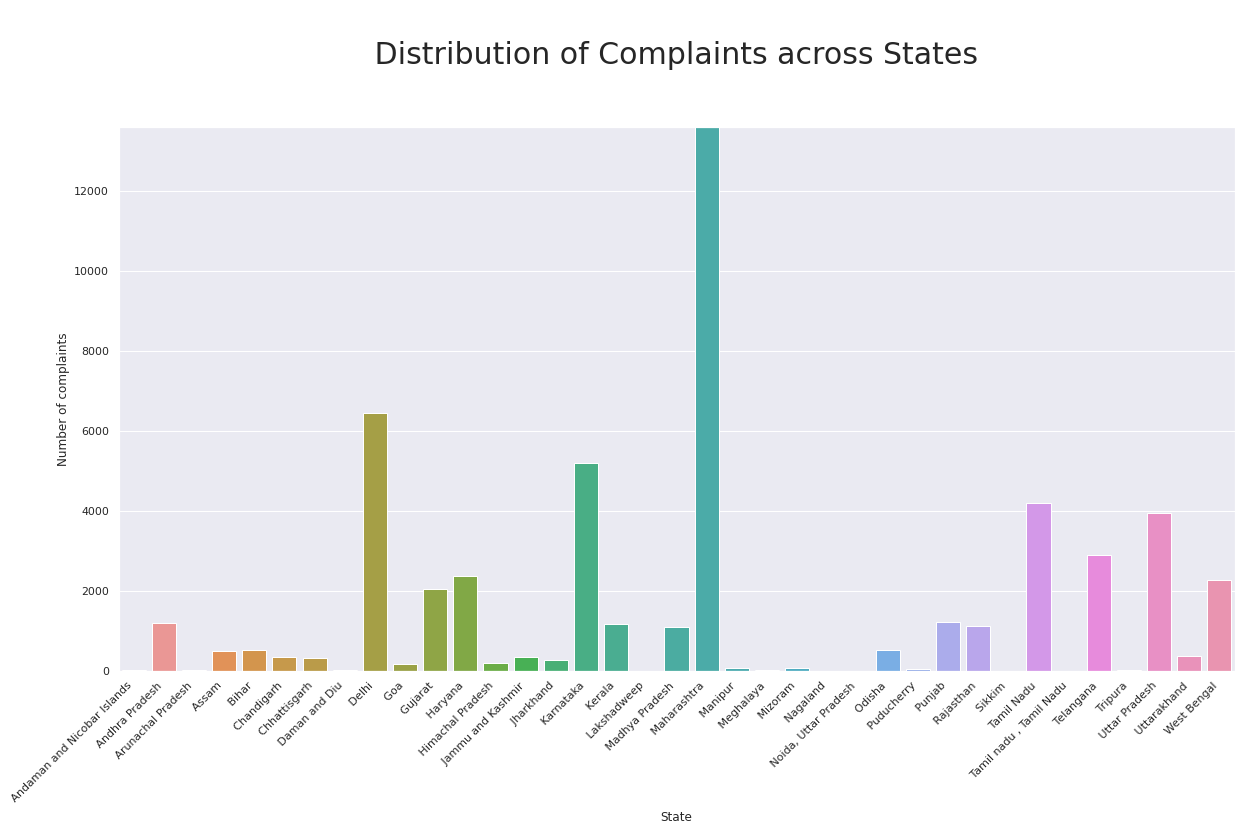

In [ ]:
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=45, ha='right')

y = sns.barplot(x='State', y='total count', data=i)
y.set(ylim=(0,13580))
y.set_ylabel("Number of complaints")
y.set_title("\n Distribution of Complaints across States \n", fontsize=30, pad=30)

***An Interactive visualization of Distribution of complaints across states through a Pie Chart (Hover over each sector of pie chart to see the values):***

In [ ]:
fig = px.pie(i, values="total count", names="State", width=1200, height=1200, title='Distribution of complaints across states')
fig.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))
fig.show(renderer="colab")

***Observations from the Barplot and Pie Chart visualization of distribution of complaints across States***:
1. **Maharashtra leads the complaint count with maximum number of complaints - followed by Delhi, Karnataka, Tamil Nadu**. 

# ***Distribution of number of resolved and unresolved complaints across states***

***Remove States with less than 10 overall resolved counts along with anomalies***

In [ ]:
state_status = df[['State','resolved-status']]
state_status = state_status.dropna()

state_resolved = state_status.loc[state_status['resolved-status'] != 'Not Resolved']
state_notresolved = state_status.loc[state_status['resolved-status'] == 'Not Resolved']
#State vs Resolved and Non-resoved count grouping
state_notresolved1 = state_notresolved.groupby('State', as_index=False)['resolved-status'].count()
state_notresolved1.rename(columns={'resolved-status':'not resolved count'}, inplace=True)
#print(state_notresolved1)
print("\n")
state_resolved1 = state_resolved.groupby('State', as_index=False)['resolved-status'].count()
state_resolved1.rename(columns={'resolved-status':'resolved count'}, inplace=True)
#print(state_resolved1)

resolveddict = dict(zip(state_resolved1['State'],state_resolved1['resolved count']))
state_status_dist = state_notresolved1.copy()
state_status_dist["Resolved"] =state_status_dist["State"].map(resolveddict)

#Dropping anomalous values from State category
state_status_dist = state_status_dist[state_status_dist['State'] != ' Balasore, Odisha']
state_status = state_status_dist[state_status_dist['State'] != ' Bidhuna, Uttar Pradesh']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Chakrata, Uttarakhand']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Dadra and Nagar Haveli']
state_status_dist = state_status_dist[state_status_dist['State'] != ' East Garo Hills., Meghalaya']
state_status_dist = state_status_dist[state_status_dist['State'] != 'Dibiyapur, Uttar Pradesh']
state_status_dist = state_status_dist[state_status_dist['State'] != 'KARAJAGI, Maharashtra']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Karnataka98, Karnataka']
state_status_dist = state_status_dist[state_status_dist['State'] != 'Noida, Uttar Pradesh']
state_status_dist = state_status_dist[state_status_dist['State'] != 'Tamil nadu , Tamil Nadu']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Lakshadweep']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Nagaland']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Sikkim']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Daman and Diu']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Arunachal Pradesh']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Andaman and Nicobar Islands']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Puducherry']
state_status_dist = state_status_dist[state_status_dist['State'] != ' Tripura']


#Adding total count along with count of resolved and unresolved status
state_status_dist['Total count'] = state_status_dist['not resolved count'] + state_status_dist['Resolved'] 
state_status_dist

State  not resolved count  Resolved  Total count
1       Andhra Pradesh                 697     502.0       1199.0
3                Assam                 332     157.0        489.0
5                Bihar                 300     215.0        515.0
6           Chandigarh                 153     206.0        359.0
7         Chhattisgarh                 190     126.0        316.0
10               Delhi                3070    3365.0       6435.0
11                 Goa                  84      88.0        172.0
12             Gujarat                1070     984.0       2054.0
13             Haryana                1116    1265.0       2381.0
14    Himachal Pradesh                 139      50.0        189.0
15   Jammu and Kashmir                 191     148.0        339.0
16           Jharkhand                 155     121.0        276.0
17           Karnataka                2587    2604.0       5191.0
19              Kerala                 602     562.0       1164.0
21      Madhya Pradesh                 638     463.0       1101.0
22         Maharashtra                7636    6864.0      14500.0
23             Manipur                  55      18.0         73.0
24           Meghalaya                  19      14.0         33.0
25             Mizoram                  46      22.0         68.0
27              Odisha                 296     224.0        520.0
29              Punjab                 675     536.0       1211.0
30           Rajasthan                 613     515.0       1128.0
32          Tamil Nadu                1999    2194.0       4193.0
33           Telangana                1487    1399.0       2886.0
35       Uttar Pradesh                2156    1787.0       3943.0
36         Uttarakhand                 241     143.0        384.0
37         West Bengal                1290     986.0       2276.0

In [ ]:
state_bar = state_status_dist.copy()



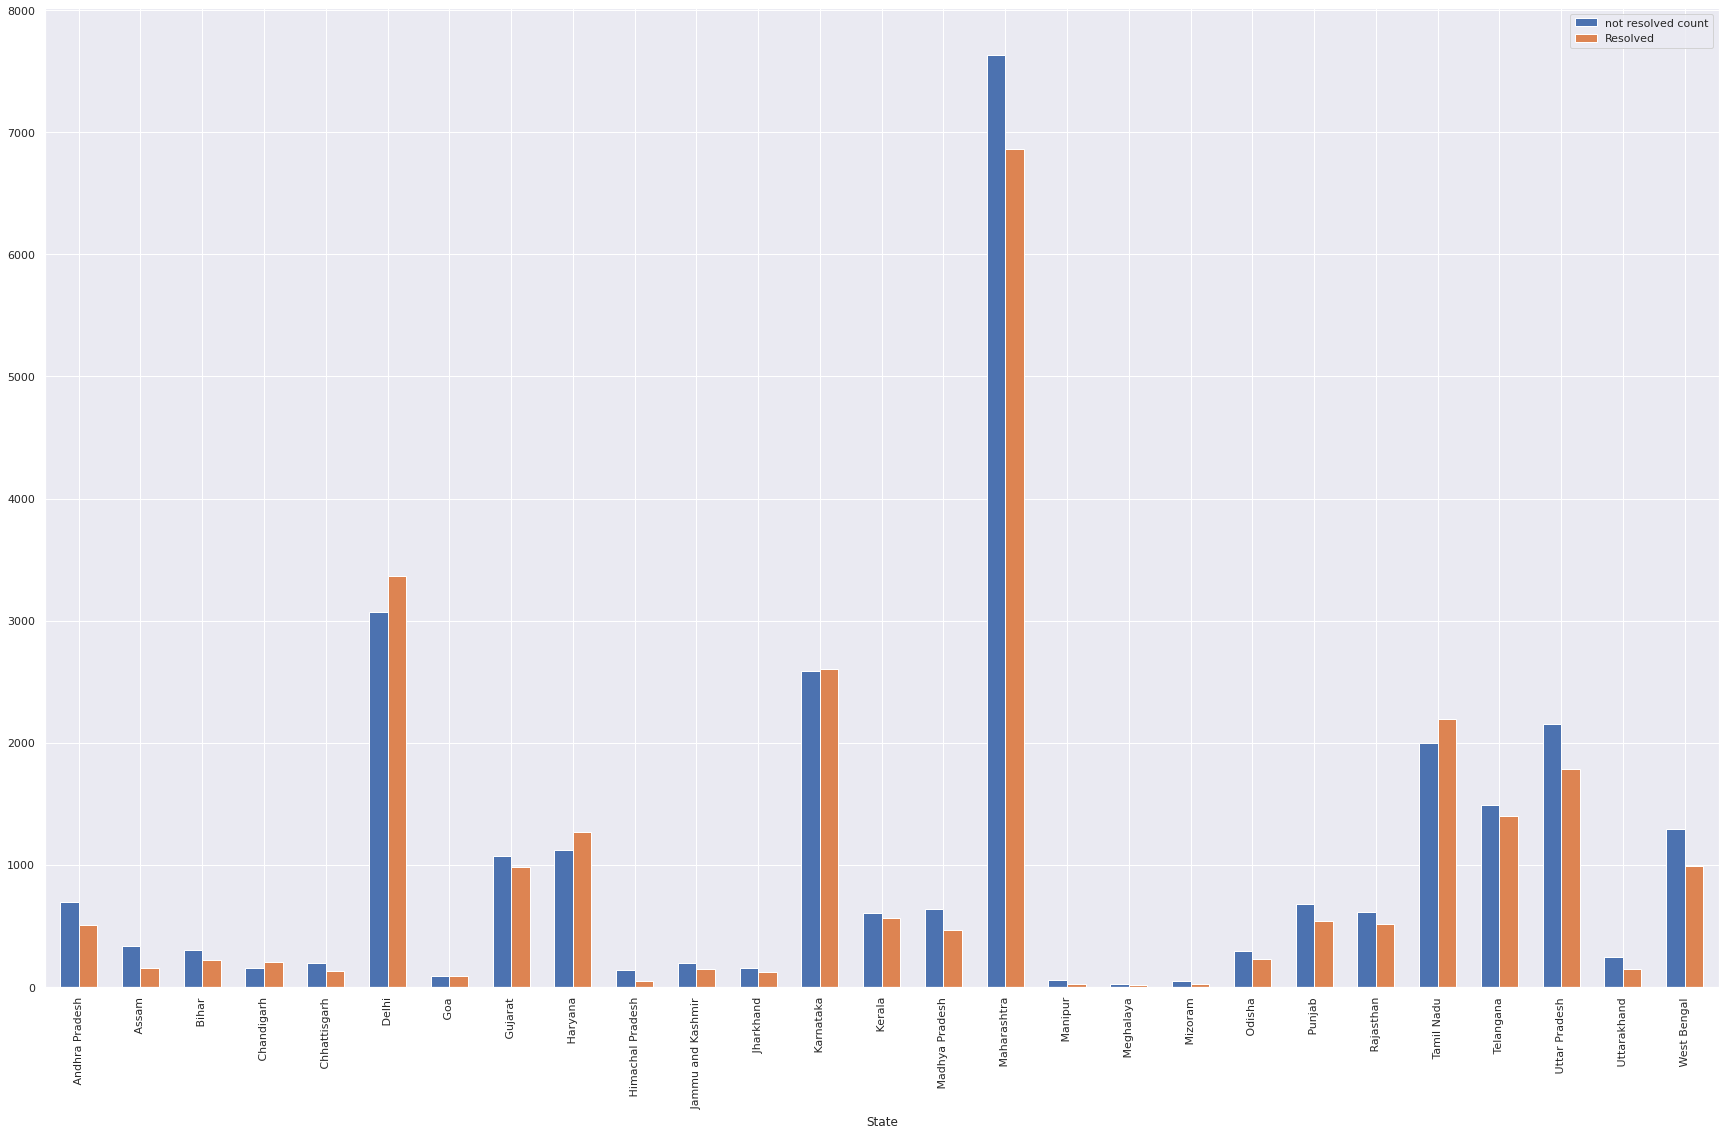

In [ ]:
state_status_dist.plot(x="State", y=["not resolved count", "Resolved"], kind="bar", figsize=(30,18), width=0.6)


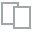
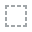
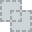
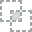
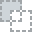
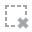
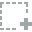
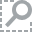
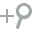
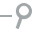
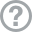
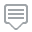
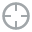
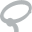
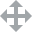
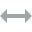
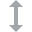
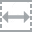
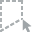
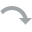
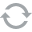
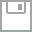
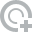
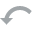
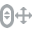
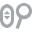
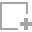
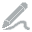
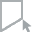
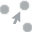
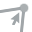
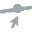

In [ ]:
plot(df,'City')


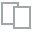
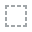
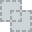
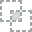
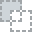
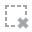
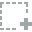
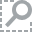
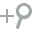
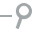
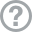
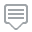
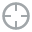
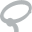
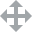
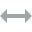
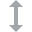
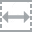
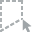
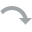
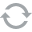
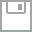
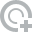
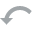
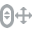
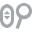
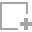
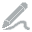
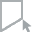
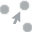
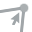
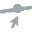

In [ ]:
plot(df,'Comp Name')

In [ ]:
#j = create_report(df)
report = create_report(df, title='My Report')


In [ ]:
#trend analysis

gg = df[['complaint_date_changed','web-scraper-order']]

In [ ]:
gg = gg.dropna()
gg.head()

complaint_date_changed web-scraper-order
2               23-01-2019   1624943954-6500
3               17-10-2018   1624945602-6877
18              07-11-2019   1624944033-6522
29              12-04-2018   1624945301-6783
113             15-06-2021   1624945513-6847

In [ ]:
gg['year'] = gg['complaint_date_changed'].str[-4:]

In [ ]:
gg = gg.sort_values(by='complaint_date_changed', ascending=True)
gg

complaint_date_changed web-scraper-order  year
67134             01-01-2011   1625061194-3264  2011
26310             01-01-2011    1625053842-321  2011
36680             01-01-2011  1625062633-22289  2011
68212             01-01-2011   1625061275-4041  2011
38305             01-01-2011  1625062748-23334  2011
...                      ...               ...   ...
34973             31-12-2020  1625059863-17629  2020
15887             31-12-2020  1624820763-10159  2020
45707             31-12-2020  1625061467-28140  2020
6781              31-12-2020   1624904346-1845  2020
21506             31-12-2020  1624820757-10156  2020

[32661 rows x 3 columns]

***Complaints for 2011 - 2021***

In [ ]:
gg['year'] = pd.to_datetime(gg['complaint_date_changed'])
gg.head()

complaint_date_changed web-scraper-order       year
67134             01-01-2011   1625061194-3264 2011-01-01
26310             01-01-2011    1625053842-321 2011-01-01
36680             01-01-2011  1625062633-22289 2011-01-01
68212             01-01-2011   1625061275-4041 2011-01-01
38305             01-01-2011  1625062748-23334 2011-01-01

In [ ]:
gg3 = gg[['web-scraper-order', 'year']]
m = gg3.groupby('year', as_index=False)['web-scraper-order'].count()
m

year  web-scraper-order
0    2011-01-01                  5
1    2011-01-02                  4
2    2011-01-03                  4
3    2011-01-04                 10
4    2011-01-05                  7
...         ...                ...
3419 2021-06-26                 22
3420 2021-06-27                  5
3421 2021-06-28                  6
3422 2021-06-29                 12
3423 2021-06-30                  7

[3424 rows x 2 columns]

In [ ]:
m['year'] = m['year'].astype(str)

In [ ]:
m['year_only'] = m['year'].str[0:4]
m

year  web-scraper-order year_only
0     2011-01-01                  5      2011
1     2011-01-02                  4      2011
2     2011-01-03                  4      2011
3     2011-01-04                 10      2011
4     2011-01-05                  7      2011
...          ...                ...       ...
3419  2021-06-26                 22      2021
3420  2021-06-27                  5      2021
3421  2021-06-28                  6      2021
3422  2021-06-29                 12      2021
3423  2021-06-30                  7      2021

[3424 rows x 3 columns]

In [ ]:
l = m.groupby('year_only', as_index=False)['web-scraper-order'].sum()

<Figure size 1152x720 with 0 Axes>

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


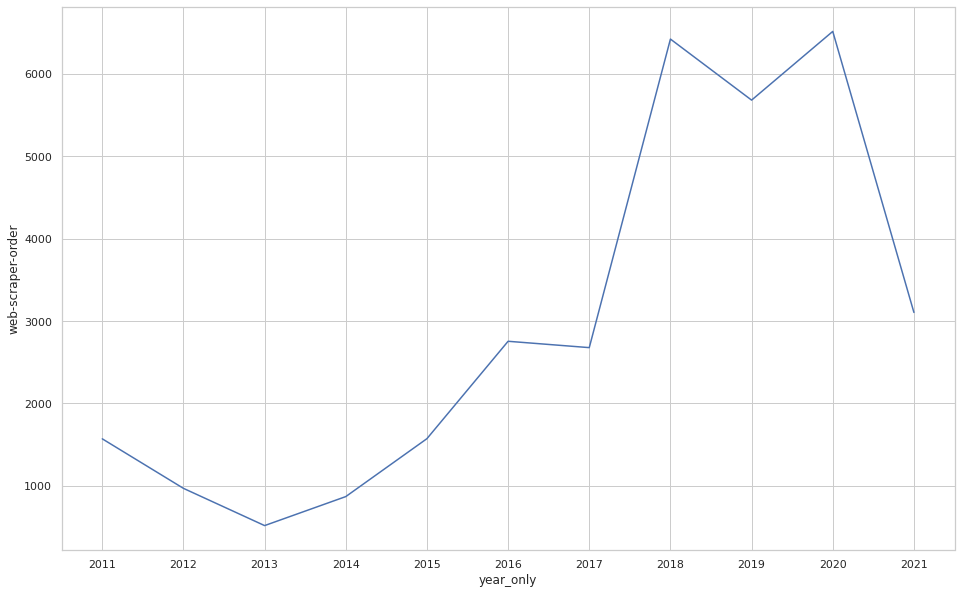

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(16,10))


sns.lineplot(data=l, x="year_only", y="web-scraper-order")
